# ARC Prize 2024

This notebook is an experimental approach on solving the ARC challenge. See https://arcprize.org/ for more details.

In [1]:
import os
import torch

from pathlib import Path

from arc2024.data import Dataset
from arc2024.utils import plot

## Download and pre-process Dataset

In [2]:
dataset_dir = Path('datasets')

dataset = Dataset(
    dataset_dir=dataset_dir,
    mode='training',
    permutations=True
)

## Visualize Random Challenge from Training Dataset

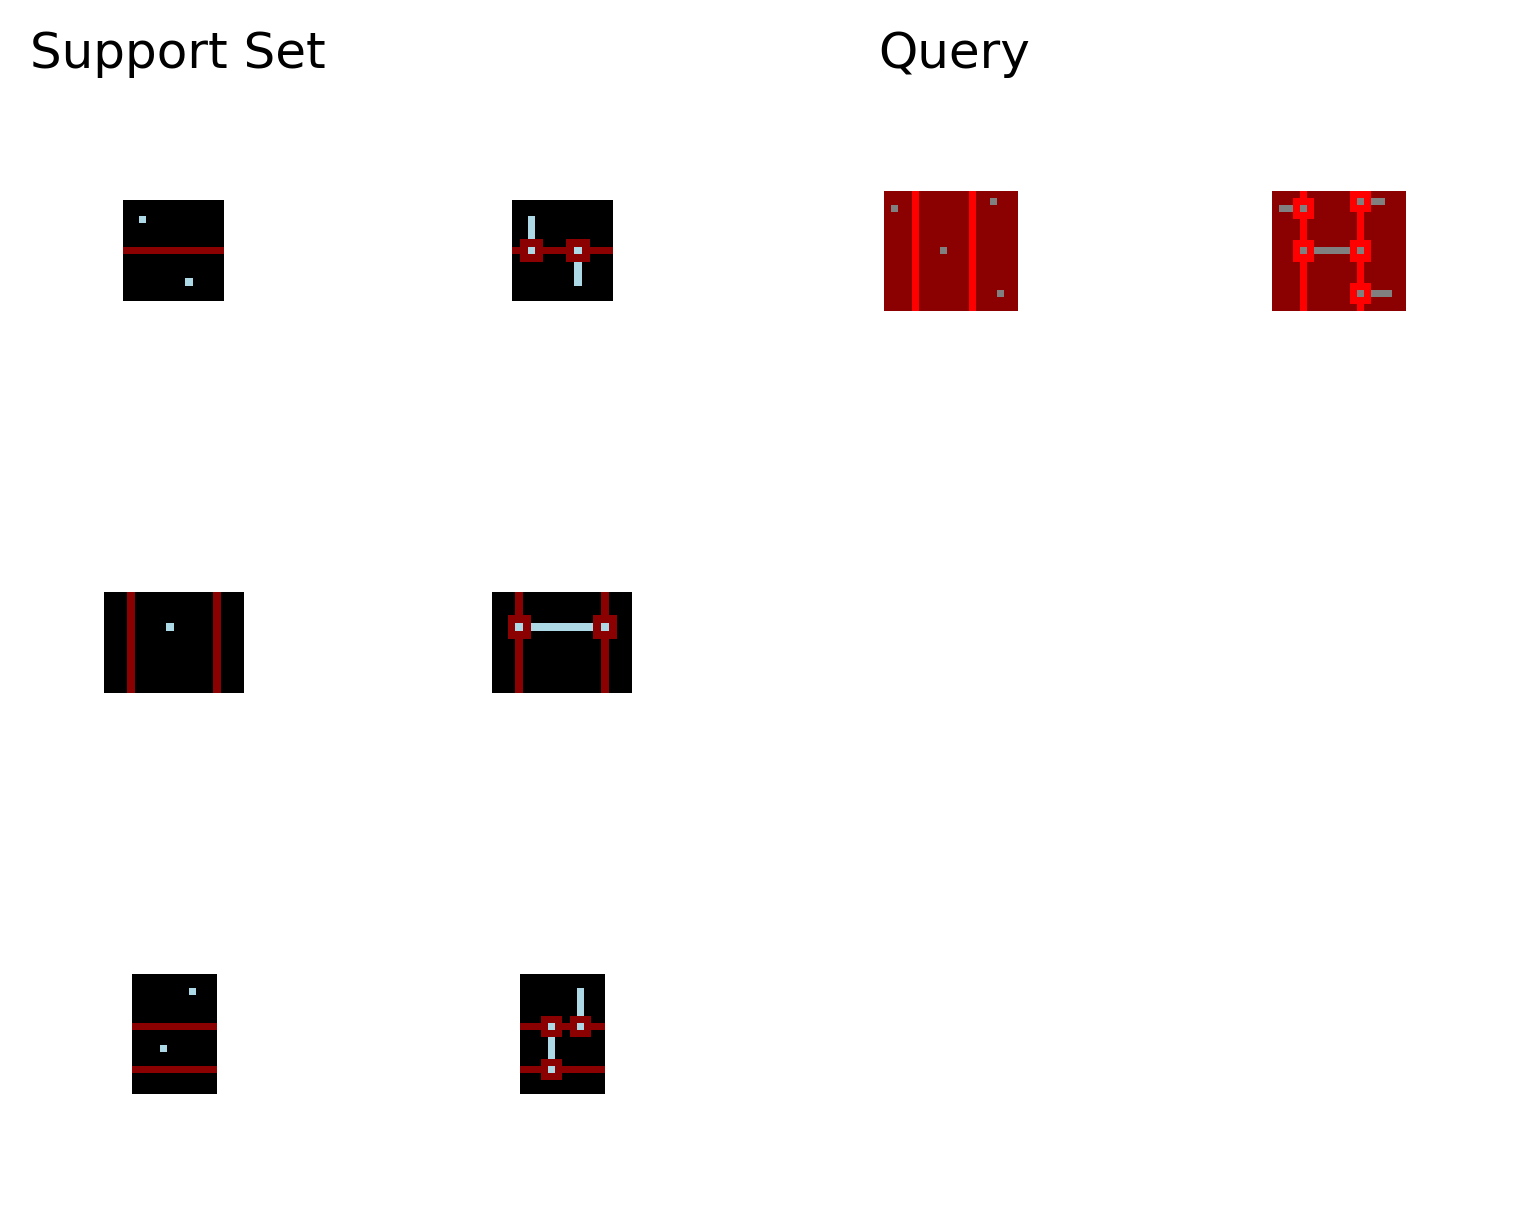

In [5]:
import random

# random.seed(42)
plot_n_support_set_items = 3

support_set_inputs, support_set_outputs, query_inputs, query_outputs = random.choice(dataset)

plot.challenge(
    support_set_inputs=support_set_inputs[:plot_n_support_set_items],
    support_set_outputs=support_set_outputs[:plot_n_support_set_items],
    query_inputs=query_inputs,
    query_outputs=query_outputs
)

## Turn the Dataset into DataLoaders

In [4]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


train_dataset = Dataset(
    dataset_dir=dataset_dir,
    mode='training',
    permutations=False
)
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataset = Dataset(
    dataset_dir=dataset_dir,
    mode='evaluation'
)
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)